In [1]:
import torch
import numpy as np
from torch import tensor
from numpy import array
from numpy import transpose

In [2]:
# input is scalar, output is scalar
x = tensor(1.0, requires_grad=True)
print('x:', x)
y = x**2
print('y:', y)
y.backward() # this is the same as y.backward(tensor(1.0))
print('x.grad:', x.grad)

# want: dy/dx
# dy/dx = d(x^2)/dx = 2x where x is 1, so
# gradient is 2

x: tensor(1., requires_grad=True)
y: tensor(1., grad_fn=<PowBackward0>)
x.grad: tensor(2.)


In [3]:
x = x.detach().numpy()
J = array([[2*x]])
print('J:', J)

J: [[2.]]


In [4]:
v = array([[1,]])
print('v:', v)
print('v*J:', v@J)

v: [[1]]
v*J: [[2.]]


In [5]:
# input is scalar, output is scalar, non-default gradient
x = torch.tensor(1.0, requires_grad=True)
print('x:', x)
y = x**2
print('y:', y)
gradient_value=100.0
print(y.backward(torch.tensor(gradient_value)))
print('x.grad:', x.grad)

x: tensor(1., requires_grad=True)
y: tensor(1., grad_fn=<PowBackward0>)
None
x.grad: tensor(200.)


In [6]:
x = x.detach().numpy()
J = array([[2*x]])
print('J:', J)

v = array([[gradient_value,]])
print('v:', v)
print('v*J:', v@J)

J: [[2.]]
v: [[100.]]
v*J: [[200.]]


In [7]:
# input is vector, output is scalar
x = tensor([1.,2.], requires_grad=True)
print('x:', x)
y = sum(x)
print('y:', y)
y.backward()
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor(3., grad_fn=<AddBackward0>)
x.grad: tensor([1., 1.])


In [8]:
J = array([[1,1]])
print('J:\n', J)

J:
 [[1 1]]


In [9]:
v = array([[1]])
print('v:', v)
print('v*J:', v@J)

v: [[1]]
v*J: [[1 1]]


In [10]:
# input is vector, output is vector
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = 3*x**2
print('y:', y)
gradient_value = [1., 1.]
y.backward(tensor(gradient_value))
print('x.grad', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad tensor([ 6., 12.])


In [11]:
x = x.detach().numpy()
J = array([[6*x[0], 0],
           [0,6*x[1]]])
print('J:\n', J)

J:
 [[ 6.  0.]
 [ 0. 12.]]


In [12]:
v = array([gradient_value])
# v = 1 10 100

# J = 6 0
#      0 12
print('v trans:', transpose(v)) 
print('J trans:', transpose(J))

print('v:', v)
print('v*J:', v@J)

v trans: [[1.]
 [1.]]
J trans: [[ 6.  0.]
 [ 0. 12.]]
v: [[1. 1.]]
v*J: [[ 6. 12.]]


In [13]:
# input is vector, output is vector, non-one gradient
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = 3*x**2
print('y:', y)
gradient_value = [1., 10.]
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad: tensor([  6., 120.])


In [14]:
x = x.detach().numpy()
J = array([[6*x[0], 0], [0, 6*x[1]]])
print('J:\n', J)

v = array([gradient_value])
print('v:', v)
print('v*J:', v@J)

J:
 [[ 6.  0.]
 [ 0. 12.]]
v: [[ 1. 10.]]
v*J: [[  6. 120.]]


In [15]:
# input is vector, output is vector - another example
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = torch.empty(3)
y[0]=3*x[0]**2
y[1]=x[0]**2 + 2*x[1]**3
y[2]=10*x[1]
print('y:', y)
gradient_value = [1., 10., 100.,]
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 17., 20.], grad_fn=<CopySlices>)
x.grad: tensor([  26., 1240.])


In [16]:
x = x.detach().numpy()
J = array([[6*x[0], 0],
          [2*x[0], 6*x[1]**2],
          [0, 10]])
print('J:\n', J)

# the jacobian matrix
# 6 0         
# 2 24    
# 0 10         

v = array([1., 1., 1.])
# vector
# 1
# 10
# 100

print('v:', v)
print('v*J:', v@J)
# output ??
# 8
# 34

J:
 [[ 6.  0.]
 [ 2. 24.]
 [ 0. 10.]]
v: [1. 1. 1.]
v*J: [ 8. 34.]


In [17]:
#########
a = tensor([2., 3.], requires_grad=True)
b = tensor([6., 4.], requires_grad=True)
print('a:', a)
print('b:', b)

Q = 3*a**3 - b**2
# Jacobian matrix
#
#
#


print('Q:', Q)
gradient = tensor([1., 1.])
Q.backward(gradient=gradient)
print('a.grad:', a.grad)
print('b.grad:', b.grad)


a: tensor([2., 3.], requires_grad=True)
b: tensor([6., 4.], requires_grad=True)
Q: tensor([-12.,  65.], grad_fn=<SubBackward0>)
a.grad: tensor([36., 81.])
b.grad: tensor([-12.,  -8.])


In [18]:
from torch.autograd import Variable
import torch

In [19]:
x = Variable(torch.FloatTensor([[1, 2, 3, 4]]), requires_grad=True)
z = 2*x
loss = z.sum(dim=1)
print('x:', x)
print('z:', z)
print('loss:', loss)

# do backward for first element of z
z.backward(torch.FloatTensor([[1,0,0,0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_() #remove gradient in x.grad, or it will accumulate

# do backward for second element of z
z.backward(torch.FloatTensor([[0,1,0,0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# do backward for all elements of z, with weight equal to the derivitive of
# loss with respect to z_1, z_2, z_3, and z_4
z.backward(torch.FloatTensor([[1,1,1,1]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# or we can directly backprop using loss
loss.backward()
print(x.grad.data)

x: tensor([[1., 2., 3., 4.]], requires_grad=True)
z: tensor([[2., 4., 6., 8.]], grad_fn=<MulBackward0>)
loss: tensor([20.], grad_fn=<SumBackward1>)
tensor([[2., 0., 0., 0.]])
tensor([[0., 2., 0., 0.]])
tensor([[2., 2., 2., 2.]])
tensor([[2., 2., 2., 2.]])


In [20]:
x = torch.ones(3, requires_grad=True)
print(x)
# 1 1 1
y = 2*x**2 # y = 2x^2
print(y)
# 2 2 2
z = 5*y # z = 5y
print(z)
# 10 10 10
 # L = z + z + z
# 30
print(z)
# z.backward(tensor([1,1,1]))
loss = z.sum()
print(loss)
loss.backward()
print(x.grad)

# want dz/dx
# dz/dy = d(5y)/dy = 5
# dy/dx = d(2x^2)/dx = 4x
# dz/dx = dz/dy * dy/dx = 5 * 4x
# where x is = 1 so we have
# 5 * 4(1) = 20
# thus the grad is 20


tensor([1., 1., 1.], requires_grad=True)
tensor([2., 2., 2.], grad_fn=<MulBackward0>)
tensor([10., 10., 10.], grad_fn=<MulBackward0>)
tensor([10., 10., 10.], grad_fn=<MulBackward0>)
tensor(30., grad_fn=<SumBackward0>)
tensor([20., 20., 20.])


Implementing basic NN 

We are essentially trying to calculate the correct weights so our output is essentially, λx.2x



In [21]:
import numpy as np
from numpy import array

In [22]:
# f = w * x
# f = 2 * x

X = array([1,2,3,4], dtype=np.float32)
Y = array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w*x
# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()
    
# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
    return ((2*x)@(y_predicted-y)).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients
    dw = gradient(X, Y, y_pred)
    
    # update weights
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')


print(f'prediction after taining f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314570
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
prediction after taining f(5) = 9.999


That stuff put with pytorch

1. Design our model (input size, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediction
    - backward pass: gradients
    - update our weights


In [23]:
import torch
from torch import tensor
import torch.nn as nn

In [24]:
X = tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = tensor([[2],[4],[6],[8]], dtype=torch.float32)

# forward

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features
# model = nn.Linear(input_size, output_size,)

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

# model prediction
X_test = tensor([5.])
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# SGD = Stochastic Gradient Descent 

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() #dL/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')


print(f'prediction after taining f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = -4.029
epoch 1: w = -0.598, loss = 53.88356781
epoch 11: w = 1.092, loss = 1.88112199
epoch 21: w = 1.379, loss = 0.50734675
epoch 31: w = 1.439, loss = 0.44510663
epoch 41: w = 1.462, loss = 0.41835266
epoch 51: w = 1.479, loss = 0.39398056
epoch 61: w = 1.495, loss = 0.37104812
epoch 71: w = 1.509, loss = 0.34945127
epoch 81: w = 1.524, loss = 0.32911131
epoch 91: w = 1.538, loss = 0.30995524
prediction after taining f(5) = 9.074


Implementing linear regression

In [25]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
#0) prepare data
#1) model
#2) loss and optimizer
#3) training loop

epoch: 10, loss: 4487.4214
epoch: 20, loss: 3344.4834
epoch: 30, loss: 2517.9756
epoch: 40, loss: 1919.6293
epoch: 50, loss: 1486.0146
epoch: 60, loss: 1171.4800
epoch: 70, loss: 943.1234
epoch: 80, loss: 777.1990
epoch: 90, loss: 656.5477
epoch: 100, loss: 568.7564


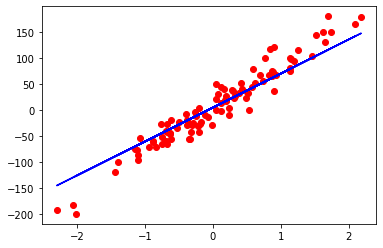

In [26]:
# preparing data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1)   

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = .01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
# training loops
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    yp = model(X)
    loss = criterion(yp, Y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')
    
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()    

Logistic Regression
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. training loop
    - forward pass: prediction and loss
    - backward pass: gradients
    - update weights 

In [27]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# prepare the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterian = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# training
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


569 30
epoch: 10, loss = 0.2072
epoch: 20, loss = 0.1787
epoch: 30, loss = 0.1574
epoch: 40, loss = 0.1411
epoch: 50, loss = 0.1284
epoch: 60, loss = 0.1182
epoch: 70, loss = 0.1098
epoch: 80, loss = 0.1029
epoch: 90, loss = 0.0970
epoch: 100, loss = 0.0919
accuracy = 0.8947


In [29]:
data = datasets.load_breast_cancer()
# print(data.target_names)
# print(data.target)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1